텐서 형태에 대한 설명글 : https://datamod.tistory.com/124

# PyTorch Tensor Operations

In [1]:
import torch

## Arithmetic Element-wise Operations

In [2]:
a = torch.FloatTensor([[1, 2],
                       [3, 4]])
b = torch.FloatTensor([[2, 2],
                       [3, 3]])

In [3]:
a + b

tensor([[3., 4.],
        [6., 7.]])

In [4]:
a - b

tensor([[-1.,  0.],
        [ 0.,  1.]])

In [5]:
a * b

tensor([[ 2.,  4.],
        [ 9., 12.]])

In [6]:
a / b

tensor([[0.5000, 1.0000],
        [1.0000, 1.3333]])

In [7]:
a == b

tensor([[False,  True],
        [ True, False]])

In [8]:
a != b

tensor([[ True, False],
        [False,  True]])

In [9]:
a ** b

tensor([[ 1.,  4.],
        [27., 64.]])

## Inplace Operations

In [10]:
print(a)
print(a.mul(b))
print(a)
print(a.mul_(b))
print(a)

tensor([[1., 2.],
        [3., 4.]])
tensor([[ 2.,  4.],
        [ 9., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 2.,  4.],
        [ 9., 12.]])
tensor([[ 2.,  4.],
        [ 9., 12.]])


In [ ]:
# 기존 Tensor에서 특정 값 바꾸기
a[0][0] = 1232
print(a)

In [ ]:
a[1][1] = '가' # a는 FloatTensor이기 때문에 chr element 불가능! Float만 가능!

## Sum, Mean (Dimension Reducing Operations)

In [11]:
x = torch.FloatTensor([[1, 2],
                       [3, 4]])

In [12]:
print(x.sum())
print(x.mean())

tensor(10.)
tensor(2.5000)


In [13]:
print(x.sum(dim=0))
print(x.sum(dim=-1))

tensor([4., 6.])
tensor([3., 7.])


In [ ]:
print(x.mean(dim=0))
print(x.mean(dim=-1))

## Broadcast in Operations
**헷갈리니까 주의!!**
What we did before,

In [14]:
x = torch.FloatTensor([[1, 2]])
y = torch.FloatTensor([[4, 8]])

print(x.size())
print(y.size())

torch.Size([1, 2])
torch.Size([1, 2])


In [15]:
z = x + y
print(z)
print(z.size())

tensor([[ 5., 10.]])
torch.Size([1, 2])


- Broadcast feature provides operations between different shape of tensors.
- => Tensor끼리 또는 Scalar/Vector끼리 연산을 할 때 연산이 되게 할 수도 있음
### Tensor + Scalar

In [16]:
x = torch.FloatTensor([[1, 2],
                       [3, 4]])
y = 1

print(x.size())

torch.Size([2, 2])


In [17]:
z = x + y
print(z)
print(z.size())

tensor([[2., 3.],
        [4., 5.]])
torch.Size([2, 2])


### Tensor + Vector

In [18]:
x = torch.FloatTensor([[1, 2],
                       [4, 8]])
y = torch.FloatTensor([3,
                       5])

print(x.size())
print(y.size())

torch.Size([2, 2])
torch.Size([2])


In [19]:
z = x + y
print(z)
print(z.size())

tensor([[ 4.,  7.],
        [ 7., 13.]])
torch.Size([2, 2])


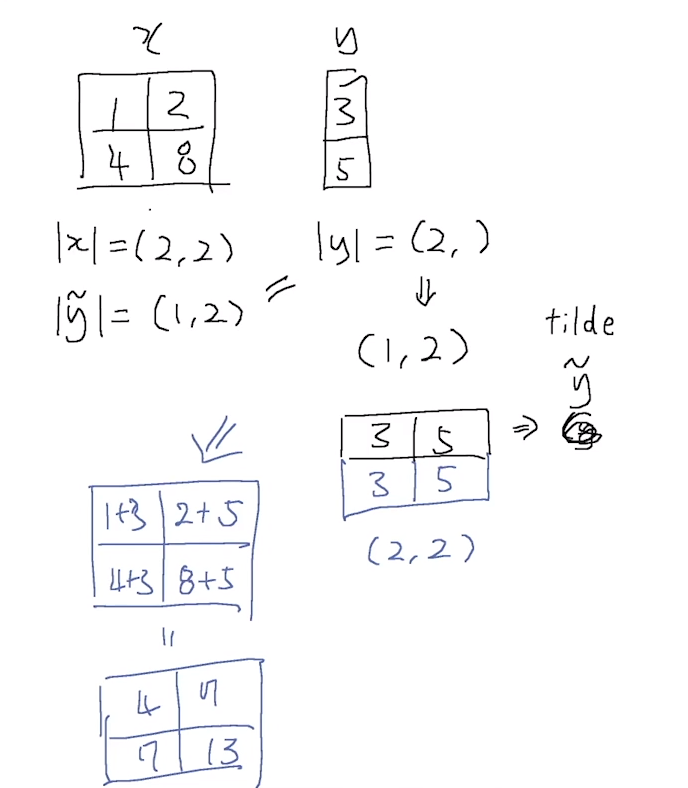

In [20]:
x = torch.FloatTensor([[[1, 2]]]) # 대괄호가 3개 => 3차원 Tensor
y = torch.FloatTensor([3,  # 대괄호가 1개 => 1차원 Tensor
                       5])

print(x.size())
print(y.size())

torch.Size([1, 1, 2])
torch.Size([2])


In [21]:
z = x + y
print(z)
print(z.size())

tensor([[[4., 7.]]])
torch.Size([1, 1, 2])


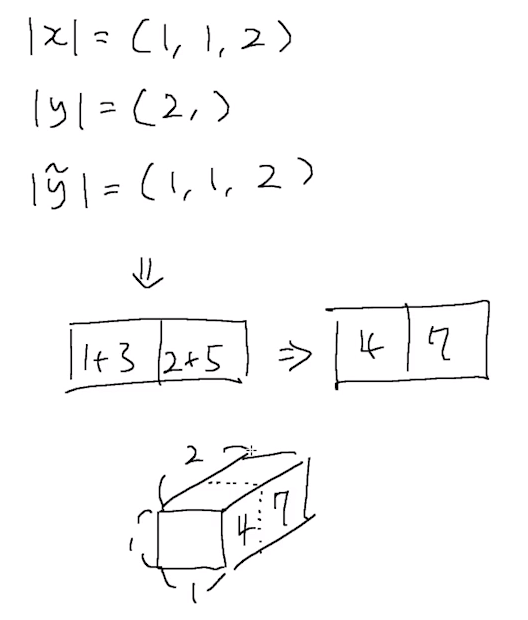

### Tensor + Tensor

In [22]:
x = torch.FloatTensor([[1, 2]])
y = torch.FloatTensor([[3],
                       [5]])

print(x.size())
print(y.size())

torch.Size([1, 2])
torch.Size([2, 1])


In [23]:
z = x + y
print(z)
print(z.size())

tensor([[4., 5.],
        [6., 7.]])
torch.Size([2, 2])


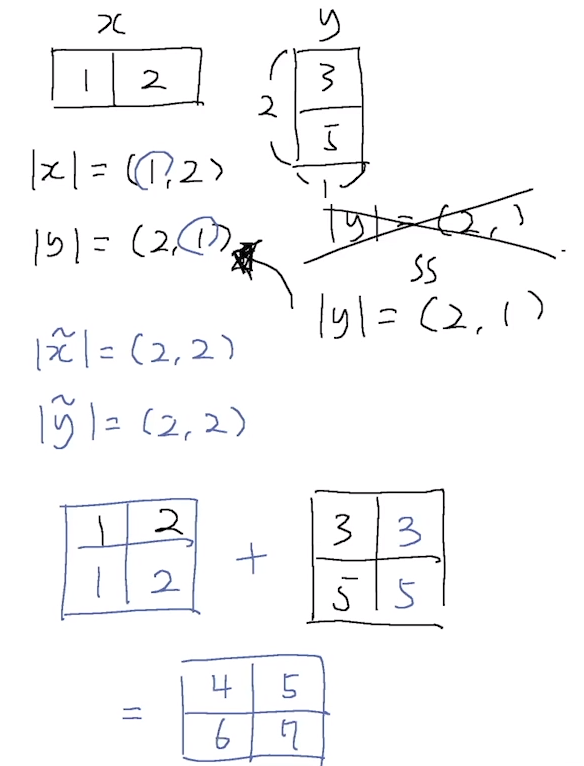

Note that you need to be careful before using broadcast feature.

### Failure Case

In [24]:
x = torch.FloatTensor([[[1, 2],
                        [4, 8]]])
y = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])

print(x.size())
print(y.size())

z = x + y

torch.Size([1, 2, 2])
torch.Size([3, 3])


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2